In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Task 2

In [19]:
# ranking of all dogs

task_2=pd.read_excel('./datasets/Test excel_intermediate_Master_Data_eng copy.xlsx', 
    sheet_name='Task 2', header=7, usecols=["Dog's name", "Points", "Ranking"])
task_2.Ranking = None
task_2.Ranking = task_2.Points.rank(ascending=False)
task_2

,Dog's name,Points,Ranking
0,Nowofundland,745,28.0
1,Bernardyn,700,40.0
2,Bernardyn,745,28.0
3,Jamnik,801,13.0
4,Nowofundland,846,2.0
5,Golden retriever,786,17.0
6,Nowofundland,864,1.0
7,Jamnik,803,10.0
8,Nowofundland,743,32.0
9,Nowofundland,708,37.0


In [4]:
# simple descriptive statistic (min, max, avg)
task_2_variable_description = pd.DataFrame(task_2.Points).describe().transpose()
task_2_variable_description

,count,mean,std,min,25%,50%,75%,max
Points,40.0,770.95,40.491183,700.0,744.0,769.5,803.0,864.0


#### Task 3

In [5]:
# gender category
task_3 = pd.read_excel('./datasets/Test excel_intermediate_Master_Data_eng copy.xlsx', 
    sheet_name='Task 3', header=5, usecols=['Name'])
task_3.loc[task_3.Name.str.endswith('a'),'Sex'] = 'female'
task_3.Sex.fillna('men', inplace=True)
task_3

,Name,Sex
0,Agata,female
1,Marcin,men
2,Łucja,female
3,Ewelina,female
4,Kamil,men
5,Kamilia,female
6,Wojciech,men
7,Przemysław,men
8,Agnieszka,female
9,Dorota,female


#### Task 4

In [6]:
task_4 = pd.read_excel('./datasets/Test excel_intermediate_Master_Data_eng copy.xlsx', 
    sheet_name='Task 4', header = 9)

In [7]:
# sort data by incident number (desc) and then by reported date (from the oldest)
task_4.sort_values(by=['Incident number', 'Reported date'], ascending=[False, False])

,Incident number,Reported date,Resolved date,Incident type,Status,Group,Company,SLM status
5559,INC000000991532,2013-05-31,2013-06-01 00:00:00,Infrastructure Event,Resolved,GRIT Service Desk Surveillance,DSV Group IT,With the Service Target
5558,INC000000991530,2013-05-31,2013-06-01 00:00:00,Infrastructure Event,Resolved,GRIT Service Desk Surveillance,DSV Group IT,With the Service Target
5557,INC000000991529,2013-05-31,-,Incident,In Progress,GRIT Service Desk Admin,DSV Group IT,With the Service Target
5556,INC000000991528,2013-05-31,2013-05-31 00:00:00,Infrastructure Event,Resolved,GRIT Service Desk Surveillance,DSV Group IT,With the Service Target
5555,INC000000991524,2013-05-31,2013-05-31 00:00:00,Infrastructure Event,Resolved,GRIT Service Desk Surveillance,DSV Group IT,With the Service Target
...,...,...,...,...,...,...,...,...
4,INC000000954818,2013-05-01,2013-05-01 00:00:00,Infrastructure Event,Closed,GRIT Service Desk Surveillance,DSV Group IT,With the Service Target
3,INC000000954815,2013-05-01,2013-05-01 00:00:00,Infrastructure Event,Closed,GRIT Service Desk Surveillance,DSV Group IT,With the Service Target
2,INC000000954814,2013-05-01,2013-05-01 00:00:00,Infrastructure Event,Closed,GRIT Service Desk Surveillance,DSV Group IT,With the Service Target
1,INC000000954813,2013-05-01,2013-05-01 00:00:00,Infrastructure Event,Closed,GRIT Service Desk Surveillance,DSV Group IT,With the Service Target


In [8]:
num_of_duplicated_id=task_4['Incident number'].duplicated().sum()
print(f'Find {num_of_duplicated_id} duplicated incident number ')

Find 0 duplicated incident number 


filter all status in yellow

In [9]:
# importing cell atributes
import openpyxl
from openpyxl import load_workbook
file_path = './datasets/Test excel_intermediate_Master_Data_eng copy.xlsx'
wb = load_workbook(file_path, data_only=True)
sh = wb['Task 4']
color_in_hex = {i:cell.fill.start_color.index for i,cell in enumerate(sh['E:E'])}

In [10]:
# filtering dataset by color in column 'Status'
colors=pd.DataFrame.from_dict(color_in_hex, orient='index', columns=['color'])
colors = colors.iloc[10:,:]
colors.reset_index(drop=True, inplace=True)
colors=colors[colors.color == 17]
yellow=colors.join(task_4)
yellow

,color,Incident number,Reported date,Resolved date,Incident type,Status,Group,Company,SLM status
57,17,INC000000955166,2013-05-01,2013-05-06 00:00:00,Request for Service,Closed,GRIT Service Desk Admin,DSV Denmark,With the Service Target
58,17,INC000000955170,2013-05-01,2013-05-01 00:00:00,Request for Service,Closed,GRIT Service Desk,DSV Denmark,With the Service Target
59,17,INC000000955173,2013-05-01,2013-05-01 00:00:00,Incident,Closed,GRIT Service Desk Surveillance,DSV Group IT,With the Service Target
60,17,INC000000955190,2013-05-01,2013-05-01 00:00:00,Incident,Closed,GRIT Service Desk,DSV Denmark,With the Service Target
61,17,INC000000955199,2013-05-01,2013-05-10 00:00:00,Incident,Closed,GRIT Service Desk Admin,DSV Group IT,With the Service Target
62,17,INC000000955201,2013-05-01,2013-05-01 00:00:00,Incident,Closed,GRIT Service Desk,DSV Denmark,With the Service Target
87,17,INC000000955318,2013-05-01,2013-05-06 00:00:00,Request for Access,Closed,GRIT Service Desk Admin,DSV Mexico,All Service Targets Breached
123,17,INC000000955399,2013-05-01,2013-05-01 00:00:00,Infrastructure Event,Closed,GRIT Service Desk Surveillance,DSV Group IT,With the Service Target
124,17,INC000000955400,2013-05-01,2013-05-01 00:00:00,Blank,Closed,GRIT Service Desk,DSV Group IT,With the Service Target
125,17,INC000000955402,2013-05-01,2013-05-01 00:00:00,Infrastructure Event,Closed,GRIT Service Desk Surveillance,DSV Group IT,With the Service Target


### Task 5

In [11]:
task_5 = pd.read_excel('./datasets/Test excel_intermediate_Master_Data_eng copy.xlsx', 
    sheet_name='Task 5', header=5, 
    usecols=['Breed', 'Name', 'Runnig time [s]', 'Temperature [oC]', 'Points', 'Place'])
task_5['Bone'] = None
task_5['Control'] = None
filter_for_bone = (task_5.Points >= 800)
filter_for_control = (task_5['Runnig time [s]'].between(18,22))
task_5.loc[filter_for_bone, 'Bone'] = True
task_5.loc[filter_for_control, 'Control'] = True
task_5.fillna(False, inplace=True)

In [12]:
task_5

,Breed,Name,Runnig time [s],Temperature [oC],Points,Place,Bone,Control
0,Nowofundland,Kulfon,17.5,40.4,745,7,False,False
1,Bernardyn,Porter,22.0,39.6,700,10,False,True
2,Bernardyn,Rumor,17.5,40.7,745,5,False,False
3,Jamnik,Kapsel,11.9,39.7,801,2,True,False
4,Nowofundland,Spławik,13.3,38.1,846,2,True,False
5,Golden retriever,Poldek,13.4,40.7,786,6,False,False
6,Nowofundland,Ares,12.9,38.2,864,1,True,False
7,Jamnik,Sparky,11.7,38.9,803,1,True,False
8,Nowofundland,Kronos,17.7,38.2,743,8,False,False
9,Nowofundland,Zeus,21.2,39.1,708,9,False,True


#### Task 6

In [13]:
task_6 = pd.read_excel('./datasets/Test excel_intermediate_Master_Data_eng copy.xlsx', 
    sheet_name='Task 6', header=8, nrows=10, 
    usecols=['Month', 'Cost 1', 'Cost 2', 'Cost 3', 'Cost 4', 'Cost 5', 'Total', 'Budget', 'deviation %'])
org_t6 = task_6.copy()
org_t6.columns

Index(['Month', 'Cost 1', 'Cost 2', 'Cost 3', 'Cost 4', 'Cost 5', 'Total',
       'Budget', 'deviation %'],
      dtype='object')

In [14]:
# figures in thousands

import warnings
warnings.filterwarnings('ignore')
task_6.iloc[:,1:-1]=round(task_6.iloc[:,1:-1]/1_000,0).astype(int).copy()

In [15]:
for col in ['Cost 1', 'Cost 2', 'Cost 3', 'Cost 4', 'Cost 5', 'Total', 'Budget']:
    task_6[col] = task_6[col].apply(lambda x: f'{x:,.0f} PLN')
task_6.set_index('Month')

,Cost 1,Cost 2,Cost 3,Cost 4,Cost 5,Total,Budget,deviation %
Month,,,,,,,,
September 2012,"240,303 PLN","456,400 PLN","546,021 PLN","591,772 PLN","651,793 PLN","2,486,290 PLN","2,686,290 PLN",0.0320
October 2012,"678,497 PLN","30,773 PLN","709,681 PLN","818,112 PLN","809,656 PLN","3,046,719 PLN","3,246,719 PLN",0.0140
November 2012,"39,451 PLN","69,581 PLN","791,932 PLN","588,647 PLN","443,265 PLN","1,932,877 PLN","2,132,877 PLN",0.0220
December 2012,"853,892 PLN","378,998 PLN","298,501 PLN","444,404 PLN","160,264 PLN","2,136,059 PLN","2,336,059 PLN",0.0400
January 2013,"797,003 PLN","829,028 PLN","466,096 PLN","475,034 PLN","273,421 PLN","2,840,582 PLN","3,040,582 PLN",0.0098
February 2013,"208,718 PLN","673,925 PLN","102,346 PLN","849,856 PLN","705,602 PLN","2,540,447 PLN","2,740,447 PLN",0.0700
March 2013,"89,788 PLN","381,082 PLN","146,117 PLN","200,929 PLN","275,087 PLN","1,093,003 PLN","1,293,003 PLN",0.0260
April 2013,"260,869 PLN","175,098 PLN","934,035 PLN","936,107 PLN","846,483 PLN","3,152,592 PLN","3,352,592 PLN",0.0060
May 2013,"135,429 PLN","467,093 PLN","863,485 PLN","563,563 PLN","857,708 PLN","2,887,278 PLN","3,087,278 PLN",0.0315


In [16]:
# graph presents costs, budget in all months
org_t6=org_t6.set_index('Month')

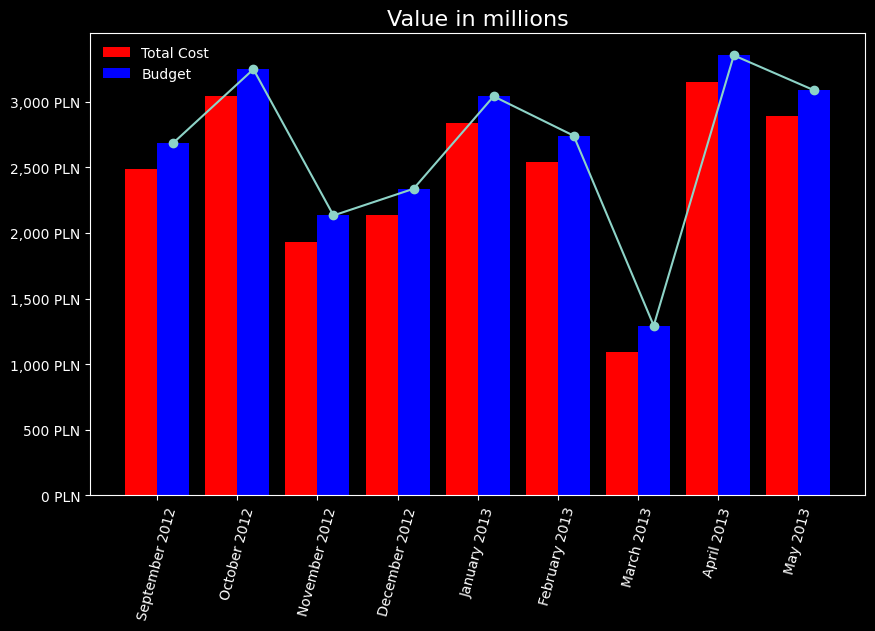

In [17]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize = (10,6))
x = np.arange(org_t6.shape[0])
width=0.4

bar1 = ax.bar(x-(width/2), height = org_t6['Total'], color='red', width=width, label='Total Cost')
bar2 = ax.bar(x+(width/2), height = org_t6['Budget'], color='blue', width=width, label='Budget')
ax.set_xticks(list(range(9)))
ax.set_xticklabels(org_t6.index.to_list(), rotation=75)

ax.set_yticks(list(np.arange(0,3.5*10**9, 0.5*10**9)))
y_ticks = [f'{num:,.0f} PLN' for num in list(np.arange(0,3.5*10**3, 0.5*10**3))]
ax.set_yticklabels(y_ticks)


ax.set_title('Value in millions', fontsize=16)
#ax.set_ylabel('Value in milions', fontsize = 14)
ax.legend(frameon=False)

ax.plot(x+(width/2), org_t6.Budget, marker='o')

plt.show()

#### Task 7

In [18]:
task_7_dict = pd.read_excel('./datasets/Test excel_intermediate_Master_Data_eng copy.xlsx', 
    sheet_name='Task 7', header=4, nrows=2).iloc[:,2:].transpose()
task_7_dict.reset_index(inplace=True)
task_7_dict.rename(columns={0:'Movie genere', 'index':'Group'}, inplace=True)

cols = ['Rank', 'Rating', "Movie's title",
       'Votes', 'Group']
task_7 = pd.read_excel('./datasets/Test excel_intermediate_Master_Data_eng copy.xlsx', 
    sheet_name='Task 7', header=7, usecols=cols)

task_7.merge(task_7_dict, how='left', on='Group')


,Rank,Rating,Movie's title,Votes,Group,Movie genere
0,1.0,9.1,The Shawshank Redemption (1994),467.084,A,Drama
1,2.0,9.1,The Godfather (1972),378.672,B,Crime
2,3.0,9.0,The Godfather: Part II (1974),222.863,B,Crime
3,4.0,8.9,"Il buono, il brutto, il cattivo. (1966)",141.188,C,Western
4,5.0,8.9,Pulp Fiction (1994),380.604,B,Crime
5,6.0,8.8,Schindler's List (1993),252.095,A,Drama
6,7.0,8.8,12 Angry Men (1957),103.300,A,Drama
7,8.0,8.8,One Flew Over the Cuckoo's Nest (1975),194.120,A,Drama
8,9.0,8.8,The Dark Knight (2008),415.201,F,Action
9,10.0,8.8,Star Wars: Episode V - The Empire Strikes Back...,256.658,G,Sci-Fi
